In [1]:
import pandas as pd

# Substitute the path_to_file content by the path to your shopping-data.csv file 
path_to_file = 'WW-data-long-2022-03-14.csv'
Waste_water = pd.read_csv(path_to_file)

In [2]:
Waste_water.shape

(2569, 15)

In [3]:
Waste_water.columns

Index(['year', 'metabolite', 'SiteID', 'country', 'city', 'Wednesday',
       'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Weekday mean', 'Weekend mean', 'Daily mean'],
      dtype='object')

<AxesSubplot: >

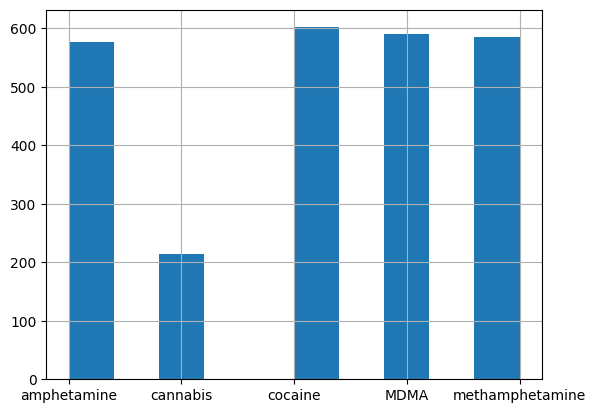

In [7]:
Waste_water['metabolite'].hist()

In [8]:
# transpose() transposes the table, making it easier for us to compare values
#Waste_water.describe().transpose()

In [9]:
Waste_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2569 non-null   int64  
 1   metabolite    2569 non-null   object 
 2   SiteID        2569 non-null   object 
 3   country       2569 non-null   object 
 4   city          2569 non-null   object 
 5   Wednesday     2551 non-null   float64
 6   Thursday      2523 non-null   float64
 7   Friday        2537 non-null   float64
 8   Saturday      2546 non-null   float64
 9   Sunday        2533 non-null   float64
 10  Monday        2533 non-null   float64
 11  Tuesday       2535 non-null   float64
 12  Weekday mean  2568 non-null   float64
 13  Weekend mean  2569 non-null   float64
 14  Daily mean    2569 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 301.2+ KB


In [10]:
Waste_water.head()

year   metabolite SiteID country               city  Wednesday  Thursday  \
0  2021  amphetamine  TR001      TR              Adana       2.50      1.75   
1  2021  amphetamine  TR003      TR  Istanbul (II-VII)      12.13     12.79   
2  2021     cannabis  TR001      TR              Adana      29.06     46.88   
3  2021     cannabis  TR003      TR  Istanbul (II-VII)      24.34     22.57   
4  2021      cocaine  TR001      TR              Adana       6.43      4.98   

   Friday  Saturday  Sunday  Monday  Tuesday  Weekday mean  Weekend mean  \
0    1.81      3.52    3.26    2.93     2.72          2.32          2.88   
1   12.06     11.94   10.19   13.59    12.76         12.56         11.95   
2   39.16     50.31   38.12   32.18    24.04         33.33         39.94   
3   22.64     23.16   22.99   28.61    26.97         24.63         24.35   
4    5.20      4.19    5.02    7.31     6.80          6.07          5.43   

   Daily mean  
0        2.64  
1       12.21  
2       37.11  
3       24.47  
4        5.71

In [ ]:
Waste_water['metabolite'].unique

In [ ]:
Waste_water['country'].value_counts(normalize=True)

In [ ]:
intervals = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000]
col = Waste_water['Daily mean']

# To be able to look at the result stored in the variable
Waste_water['Daily mean'] 

In [11]:
df = pd.read_csv('WW-data-long-2022-03-14.csv',
        header=0,
        usecols=["metabolite", "country", "year", "Daily mean"])
 
df

year       metabolite country  Daily mean
0     2021      amphetamine      TR        2.64
1     2021      amphetamine      TR       12.21
2     2021         cannabis      TR       37.11
3     2021         cannabis      TR       24.47
4     2021          cocaine      TR        5.71
...    ...              ...     ...         ...
2564  2016  methamphetamine      AT        2.01
2565  2015      amphetamine      AT        0.00
2566  2015          cocaine      AT       83.39
2567  2015             MDMA      AT       13.88
2568  2015  methamphetamine      AT        0.00

[2569 rows x 4 columns]

In [ ]:
Waste_water.groupby('country)['country'].count()

In [ ]:
# The _oh means one-hot
Waste_water_oh = pd.get_dummies(Waste_water)
# Display the one-hot encoded dataframe
Waste_water_oh 

In [ ]:
import seaborn as sns
# Seaborn is een data-visualisatie package

#dropped days one by one, bc wouldn't group.
#Waste_water = Waste_water.drop('Weekend mean', axis=1)

sns.pairplot(Waste_water)

In [ ]:
sns.scatterplot(x=Waste_water['country'],
                y=Waste_water['Daily mean'])

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Drug Waste Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = Waste_water_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')


In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

In [ ]:
Waste_water = clustering_model.labels_
sns.scatterplot(x='country', 
                y='Daily mean', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')